## Data loading and set up

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns 
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#initiate path and load data
path_to_data = "/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_student_f20/Project/data/student"
mat = pd.read_csv(path_to_data+'/student-mat.csv', sep=";")
por = pd.read_csv(path_to_data+'/student-por.csv', sep=";")

In [3]:
# merge datasets
df = pd.concat([mat,por])

In [4]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'family_size', 'parents_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'reason', 'guardian', 'commute_time', 'study_time', 'failures',
       'school_support', 'family_support', 'paid_classes', 'activities',
       'nursery', 'desire_higher_edu', 'internet', 'romantic',
       'family_quality', 'free_time', 'go_out', 'weekday_alcohol_usage',
       'weekend_alcohol_usage', 'health', 'absences', 'period1_score',
       'period2_score', 'final_score'],
      dtype='object')


In [5]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


In [249]:
# look for missing values, there is none!
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

## Overview

In [248]:
print(df.head(5))

  school sex  age address family_size parents_status  mother_education  \
0     GP   F   18       U         GT3              A                 4   
1     GP   F   17       U         GT3              T                 1   
2     GP   F   15       U         LE3              T                 1   
3     GP   F   15       U         GT3              T                 4   
4     GP   F   16       U         GT3              T                 3   

   father_education mother_job father_job  ... free_time go_out  \
0                 4    at_home    teacher  ...         3      4   
1                 1    at_home      other  ...         3      3   
2                 1    at_home      other  ...         3      2   
3                 2     health   services  ...         2      2   
4                 3      other      other  ...         3      2   

   weekday_alcohol_usage  weekend_alcohol_usage  health absences  \
0                      1                      1       3        6   
1               

In [242]:
print(df.describe())

               age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.152575     0.911714   
min       0.000000     1.000000     1

In [243]:
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


## Exploratory Data Analysis

## Categorical columns

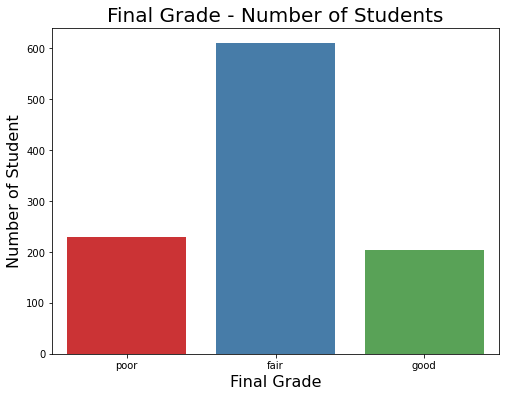

In [365]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(df.final_grade, order=["poor","fair","good"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)
plt.savefig("Final Performance.png")

**Figure Caption**
The figure demonstrates distribution of students across different final grafes performance. Around 60% of the students have a fair performance, but 20% of them have a poor and 20% have good performance. This is a very high % of students have a poor performance and fit with the idea that many Portugese students were underperforming. 

## Continous Columns

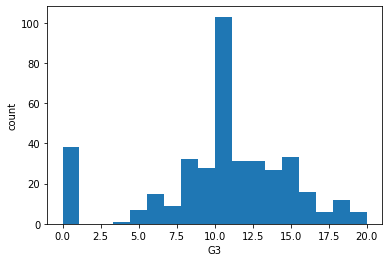

<Figure size 432x288 with 0 Axes>

In [366]:
#math score distribution
mat['G3'].plot.hist(bins = mat['G3'].nunique())  
plt.xlabel('G3')
plt.ylabel('count')
plt.show()
plt.savefig("Math score distribution.png")

**Figure Caption**
The figure demonstrates distribution of students' math test scores. The math score distribution is relatively even on two sides. Most students (100 to be exact) have a grade of 10, which is an average score and 40 students have a score of 0, which is very concerning. 

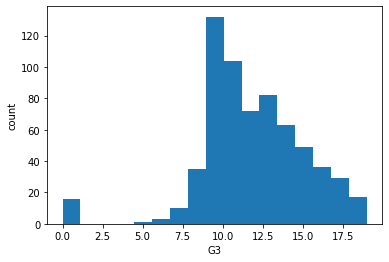

<Figure size 432x288 with 0 Axes>

In [367]:
#portugese score distirbution
por['G3'].plot.hist(bins = por['G3'].nunique())  
plt.xlabel('G3')
plt.ylabel('count')
plt.show()
plt.savefig("Portugese score distribution.png")

**Figure Caption**
The figure demonstrates distribution of students' Portugese test scores. The Portugese score distribution is more rightward-skewed than the Math test score. Most students (~130) have a grade of 10, which is an average score and 20 students have a score of 0, which is very concerning. However, it seems like more students have a higher Portugese score than Math scores. This poses questions about Math vs Portugese teaching level of Portugese schools.

## Continous vs continous 

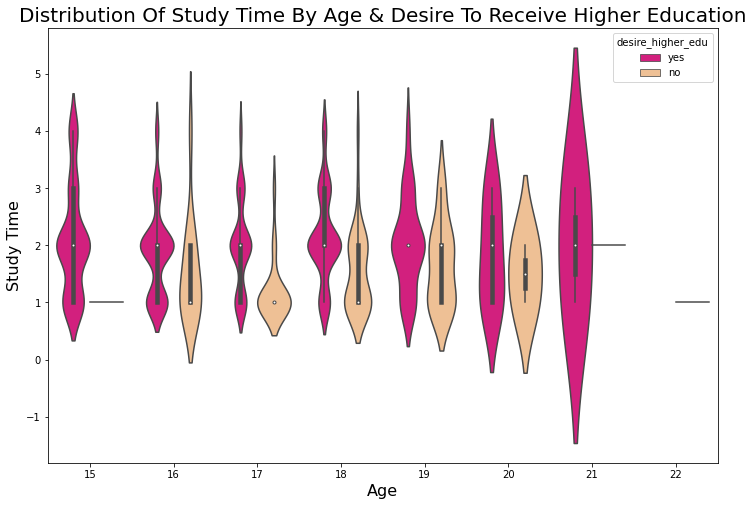

In [368]:
# Desire for higher education and study time by age 
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='study_time', hue='desire_higher_edu', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.savefig("Distribution Of Study Time By Age & Desire To Receive Higher Education.png")

**Figure Caption**
The figure demonstrates distribution of students' study time across different age, classified into whether the student wants to achieve higher education or not. It seems that the older the students get, the more they want to achieve higher education, but also overall, however, the distribution of students who don't want to achieve higher education is also quite close to those who want to, which raises some concerns about how the Portugese school system and other social factors influence students' choice to achieve higher education. There is also a positive relationship between the students' study time and whether they want to achieve higher education. This makes sense because more motivated students will want to achieve higher educaiton. However, this alerts that more measures should be taken to incentivies students to study more and year higher education in a way that balance their well-being and happiness as well.

## Categorical vs Categorical Columns 

<Figure size 432x288 with 0 Axes>

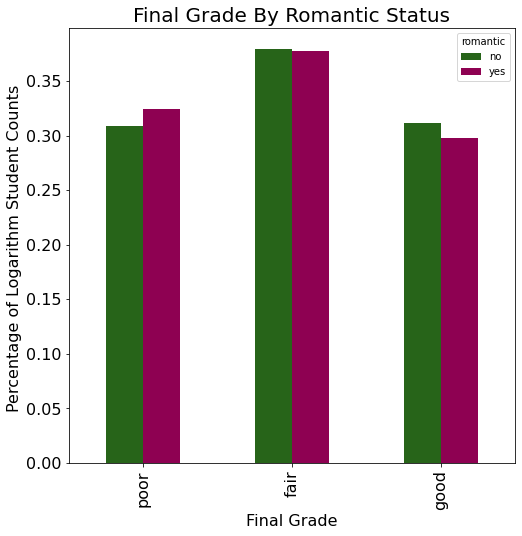

<Figure size 432x288 with 0 Axes>

In [381]:
## Romantic Relationship and School Performance
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
plt.savefig("Final Grade By Romantic Status.jpg")

**Figure Caption**
The figure demonstrates distribution of students' relationship status across different final grade performance. It seems that more students who don't have a relationship have better final grade performance and vice versa, though the disparity isn't siginificant. This signals that students should not be in a relationship if they want to do well in school, but since the difference is not big, intervention measures need to be sensible and cognizant of the students' social development. 

## Continous vs Catergorical Columns 

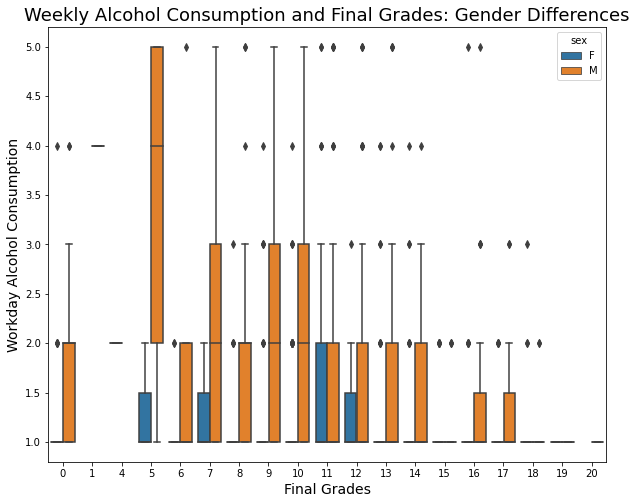

In [376]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="final_score", y="weekday_alcohol_usage", hue='sex',data=df)
plt.ylabel("Workday Alcohol Consumption", size=14)
plt.xlabel("Final Grades",size=14)
plt.title("Weekly Alcohol Consumption and Final Grades: Gender Differences", size=18)
plt.savefig("Weekly Alcohol Consumption and Final Grades: Gender Differences.png")

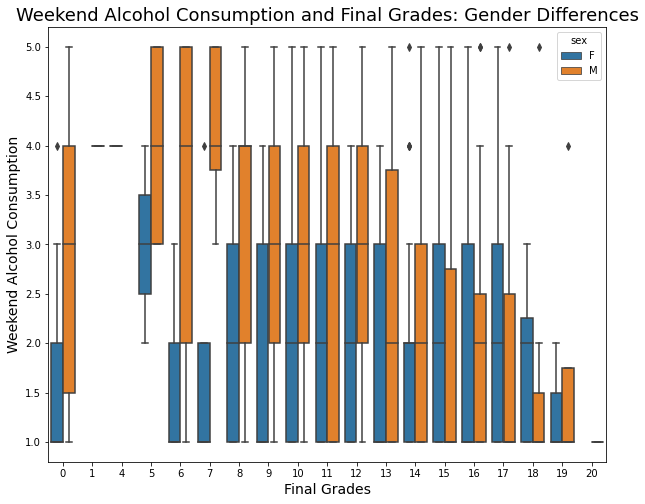

In [377]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="final_score", y="weekend_alcohol_usage", hue='sex',data=df)
plt.ylabel("Weekend Alcohol Consumption", size=14)
plt.xlabel("Final Grades",size=14)
plt.title("Weekend Alcohol Consumption and Final Grades: Gender Differences", size=18)
plt.savefig("Weekend Alcohol Consumption and Final Grades: Gender Differences.png")

**Figure Caption**
The figures demonstrate final grades across measures of distributions of students' weekend and weekday alcohol consumption, classified by gender. There are some expected observations here. Students who have less alcohol consumption tend to get higher grades and vicer versa, and more male students consume alcohol than female students. Students drink significantly more on the weekend than weekday. This suggests that some intervention and educational efforts should be executed to teach students about appropriate drink habits and how it can affect their study.

# Matrix

## Scatter matrix

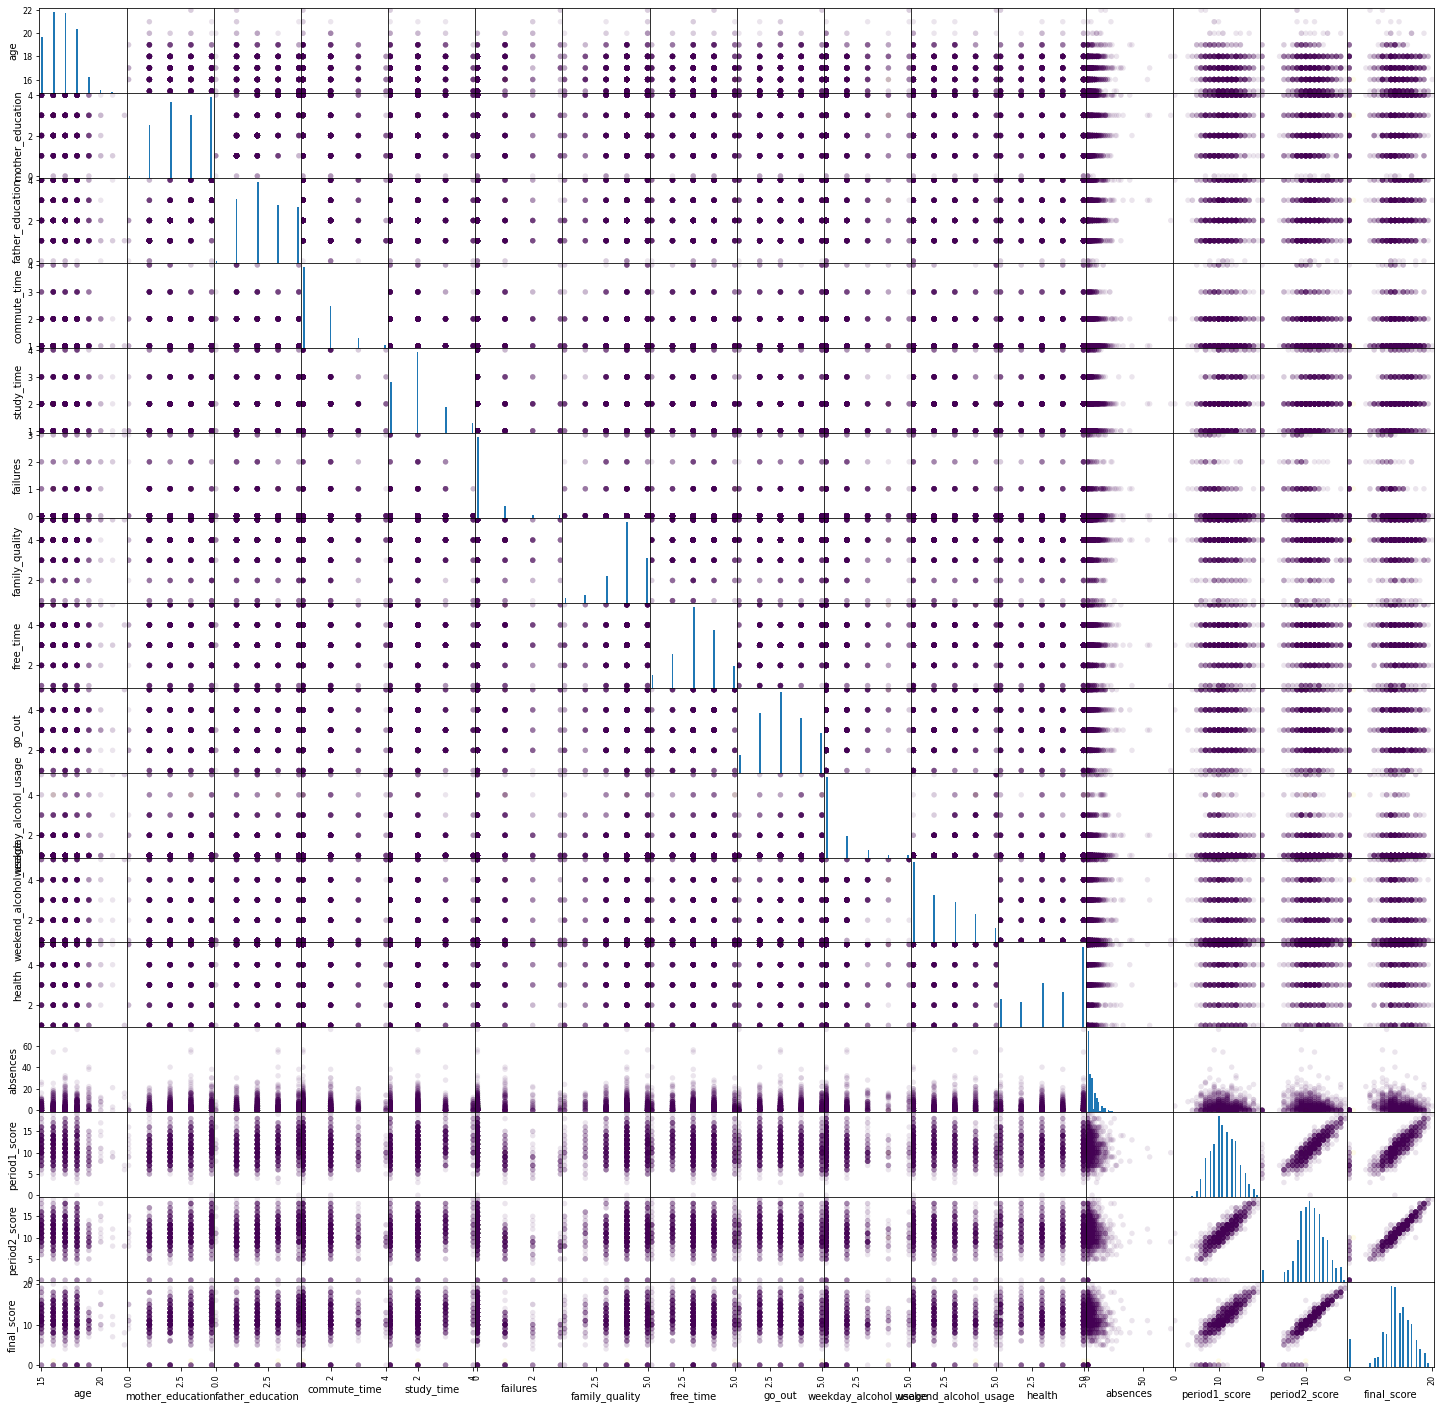

<Figure size 432x288 with 0 Axes>

In [379]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(25, 25),c = pd.get_dummies(df['final_score']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.show()
plt.savefig("Final Score Scatter Matrix.png")

**Figure Caption**
The figure encapsulates the relationship between all variables in the dataset for regression problems. It seems that there is a strong positive relationship between the 1st and 2nd period scores and final scores, signaling that score prediction can be quite accurate. Relationships between final scores and other variales aren't s obvious.

## Correlation heatmap

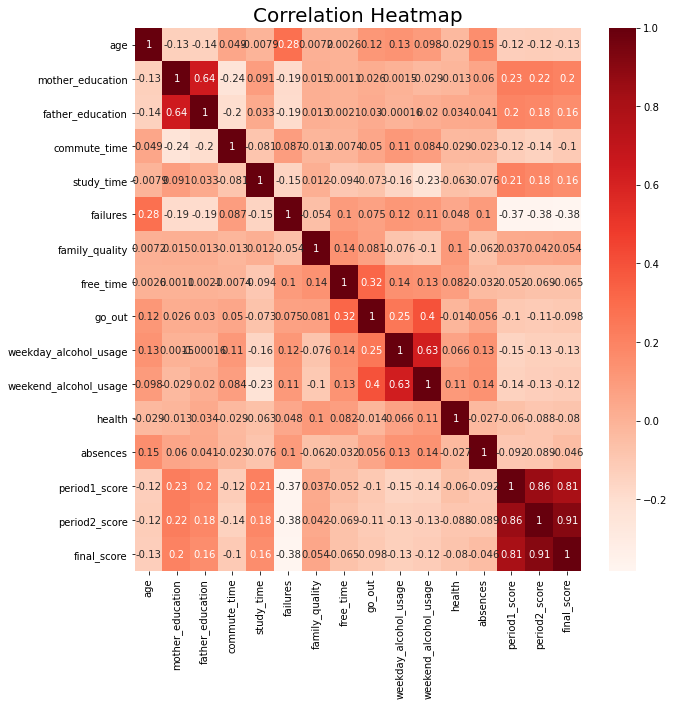

In [373]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)
plt.savefig("Correlation Heatmap.png")

**Figure Caption**
The figure encapsulates the correlation between all variables in the dataset for classification problems. It seems that there is a strong positive relationship between the 1st and 2nd period scores and final scores, signaling that score prediction can be quite accurate. Final scores also seem to have quite strong positive relationships with the mother and father's education and study time which is quite expected. Some other positive but weaker relationships between finals cores and other variables include family quality and free time, sugesting that such factors can be important to focus on to improve students' performance. There are is also a negative relationship between final age and scores, which can be because as the students get older, the materials they study get harder and they are less likely to get high scores. There is also a weak negative relationship between health and final scores, raising concerns that students may be studying at the expense of their mental health. 

# Data Preprocessing

## Regression

In [334]:
# Separate feature matrix and target variable
df_reg = df.copy()
y_reg = df_reg['final_score'] #predict final grades so make final grades the target variable
X_reg = df_reg.loc[:, df_reg.columns != 'final_score'] 
print("target variable:",y_reg)
print("feature matrix:", X_reg.head())

target variable: 0       6
1       6
2      10
3      15
4      10
       ..
644    10
645    16
646     9
647    10
648    11
Name: final_score, Length: 1044, dtype: int64
feature matrix:   school sex  age address family_size parents_status  mother_education  \
0     GP   F   18       U         GT3              A                 4   
1     GP   F   17       U         GT3              T                 1   
2     GP   F   15       U         LE3              T                 1   
3     GP   F   15       U         GT3              T                 4   
4     GP   F   16       U         GT3              T                 3   

   father_education mother_job father_job  ... family_quality free_time  \
0                 4    at_home    teacher  ...              4         3   
1                 1    at_home      other  ...              5         3   
2                 1    at_home      other  ...              4         3   
3                 2     health   services  ...              3     

In [335]:
## Split data using Basic Split
random_state = 42

# first split to separate out the training set
X_reg_train, X_reg_other, y_reg_train, y_reg_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)
print('training set:',X_reg_train.shape, X_reg_train.head(3), y_reg_train.shape, y_reg_train.head(3)) 
print(X_reg_other.shape, y_reg_other.shape) 

# second split to separate out the validation and test sets
X_reg_val, X_reg_test, y_reg_val, y_reg_test = train_test_split(X_reg_other,y_reg_other,train_size = 0.5,random_state=random_state)
print('validation set:',X_reg_val.shape, X_reg_val.head(3),y_reg_val.shape, y_reg_val.head(3)) 
print('test set:', X_reg_test.shape, X_reg_test.head(3), y_reg_test.shape, y_reg_test.head(3)) 

training set: (626, 33)     school sex  age address family_size parents_status  mother_education  \
102     GP   M   15       U         GT3              T                 4   
326     GP   M   17       U         GT3              T                 3   
144     GP   M   17       U         GT3              T                 2   

     father_education mother_job father_job  ... family_quality free_time  \
102                 4   services      other  ...              5         3   
326                 3      other   services  ...              4         3   
144                 1      other      other  ...              5         4   

     go_out  weekday_alcohol_usage  weekend_alcohol_usage health absences  \
102       3                      1                      1      5        2   
326       5                      3                      5      5        3   
144       5                      1                      2      5        0   

    period1_score period2_score final_grade  
102    

In [362]:
## Apply MixMax Scaler to Continous Columns with Bounds - 'Age' and 'Absences' column
#collect all continous bounded features that have not been processed
minmax_ftrs = ['age','absences']
#initialize the encoder
scaler = MinMaxScaler()
#fit X training
scaler.fit(X_train[minmax_ftrs])
#transform X train
scaler_reg_train = scaler.transform(X_reg_train[minmax_ftrs])
print("Train set", scaler_reg_train.shape)
#transform X val
scaler_reg_val = scaler.transform(X_reg_val[minmax_ftrs])
print("Validation set",scaler_reg_val.shape) 
#transform X set
scaler_reg_test = scaler.transform(X_reg_test[minmax_ftrs])
print("Test set",scaler_reg_test.shape) 

Train set (626, 2)
Validation set (209, 2)
Test set (209, 2)


In [363]:
## Apply One Hot Enconder to categorical columns
#collect all categorical features that have not been processed
onehot_ftrs = ['school','sex','age','address','family_size','parents_status', 
               'mother_job','father_job','reason','guardian','school_support',
               'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic']
# initialize the encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore') # by default, OneHotEncoder returns a sparse matrix. sparse=False returns a 2D array
# fit the training data
enc.fit(X_train[onehot_ftrs])
print('Feature names:',enc.get_feature_names(onehot_ftrs))
# transform X_train
onehot_reg_train = enc.transform(X_reg_train[onehot_ftrs])
print('Transformed train features:', onehot_reg_train)
# transform X_val
onehot_reg_val = enc.transform(X_reg_val[onehot_ftrs])
print('Transformed val features:', onehot_reg_val)
# transform X_test
onehot_reg_test = enc.transform(X_reg_test[onehot_ftrs])
print('Transformed test features:', onehot_reg_test)

Feature names: ['school_GP' 'school_MS' 'sex_F' 'sex_M' 'age_15' 'age_16' 'age_17'
 'age_18' 'age_19' 'age_20' 'age_21' 'age_22' 'address_R' 'address_U'
 'family_size_GT3' 'family_size_LE3' 'parents_status_A' 'parents_status_T'
 'mother_job_at_home' 'mother_job_health' 'mother_job_other'
 'mother_job_services' 'mother_job_teacher' 'father_job_at_home'
 'father_job_health' 'father_job_other' 'father_job_services'
 'father_job_teacher' 'reason_course' 'reason_home' 'reason_other'
 'reason_reputation' 'guardian_father' 'guardian_mother' 'guardian_other'
 'school_support_no' 'school_support_yes' 'family_support_no'
 'family_support_yes' 'paid_classes_no' 'paid_classes_yes' 'activities_no'
 'activities_yes' 'nursery_no' 'nursery_yes' 'desire_higher_edu_no'
 'desire_higher_edu_yes' 'internet_no' 'internet_yes' 'romantic_no'
 'romantic_yes']
Transformed train features: [[1. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 ...
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 1.

In [364]:
# collect all the encoders of the feature matrix for regression problems
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
         ('minmax', MinMaxScaler(), minmax_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here
X_reg_train_prep = clf.fit_transform(X_reg_train)
X_reg_val_prep = clf.transform(X_reg_val)
X_reg_test_prep = clf.transform(X_reg_test)

print("Feature train set", X_reg_train_prep.shape)
print("Feature validation set",X_reg_val_prep.shape)
print("Feature test set", X_reg_test_prep)

Feature train set (626, 53)
Feature validation set (209, 53)
Feature test set [[1.         0.         0.         ... 0.         0.42857143 0.        ]
 [1.         0.         1.         ... 0.         0.28571429 0.05333333]
 [1.         0.         1.         ... 1.         0.42857143 0.21333333]
 ...
 [1.         0.         0.         ... 0.         0.42857143 0.2       ]
 [1.         0.         0.         ... 0.         0.14285714 0.05333333]
 [1.         0.         0.         ... 0.         0.         0.        ]]


## Classification

In [349]:
# Drop final score column
df_class = df.drop(['final_score'], axis = 1)
# Separate feature matrix and target variable
y_class = df_class['final_grade'] #predict final grades so make final grades 'G3' the target variable
X_class = df_class.loc[:, df_class.columns != 'final_grade'] 
print("target variable:",y_class)
print("feaature matrix:", X_class.head())

target variable: 0      poor
1      poor
2      fair
3      good
4      fair
       ... 
644    fair
645    good
646    poor
647    fair
648    fair
Name: final_grade, Length: 1044, dtype: object
feaature matrix:   school sex  age address family_size parents_status  mother_education  \
0     GP   F   18       U         GT3              A                 4   
1     GP   F   17       U         GT3              T                 1   
2     GP   F   15       U         LE3              T                 1   
3     GP   F   15       U         GT3              T                 4   
4     GP   F   16       U         GT3              T                 3   

   father_education mother_job father_job  ... romantic family_quality  \
0                 4    at_home    teacher  ...       no              4   
1                 1    at_home      other  ...       no              5   
2                 1    at_home      other  ...       no              4   
3                 2     health   services  ...

In [350]:
## Split data using KFold split
random_state = 42

# first split to separate out the test set
X_class_other, X_class_test, y_class_other, y_class_test = train_test_split(X_class,y_class,test_size = 0.2,random_state=random_state)
print(X_class_other.shape,y_class_other.shape)
print('Feature test set:',X_class_test.shape, X_class_test.head(3), y_class_test.shape, y_test.head(3))

# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_class_train = X_class_other.iloc[train_index]
    y_class_train = y_class_other.iloc[train_index]
    X_class_val = X_class_other.iloc[val_index]
    y_class_val = y_class_other.iloc[val_index]
    print(' Feature training set:',X_class_train.shape,  X_class_train.head(3), y_class_train.shape, y_class_train.head(3))
    print(' Feature validation set:',X_class_val.shape, X_class_val.head(3),y_class_val.shape, y_val.head(3)) 
    

(835, 32) (835,)
Feature test set: (209, 32)     school sex  age address family_size parents_status  mother_education  \
576     MS   M   18       R         GT3              T                 3   
280     GP   M   17       U         LE3              A                 4   
141     GP   F   16       R         GT3              T                 1   

     father_education mother_job father_job  ... romantic family_quality  \
576                 2      other      other  ...       no              2   
280                 1   services      other  ...      yes              4   
141                 1    at_home      other  ...       no              5   

     free_time  go_out  weekday_alcohol_usage weekend_alcohol_usage health  \
576          5       5                      5                     5      5   
280          5       4                      2                     4      5   
141          1       3                      1                     1      3   

    absences period1_score perio

In [361]:
## Apply MixMax Scaler to Continous Columns with Bounds - 'Age' and 'Absences' column
#collect all continous bounded features that have not been processed
minmax_ftrs = ['age','absences']
#initialize the encoder
scaler = MinMaxScaler()
# fit the training data
scaler.fit(X_class_train[minmax_ftrs])
#transform X train
scaler_class_train = scaler.transform(X_class_train[minmax_ftrs])
print("Train set", scaler_class_train.shape)
#transform X val
scaler_class_val = scaler.transform(X_class_val[minmax_ftrs])
print("Validation set",scaler_class_val.shape) 
#transform X set
scaler_class_test = scaler.transform(X_class_test[minmax_ftrs])
print("Test set",scaler_class_test.shape) 

Train set (335, 2)
Validation set (83, 2)
Test set (209, 2)


In [356]:
## Apply One Hot Enconder to categorical columns
#collect all categorical features that have not been processed
onehot_ftrs = ['school','sex','age','address','family_size','parents_status', 
               'mother_job','father_job','reason','guardian','school_support',
               'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic']
# initialize the encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore') # by default, OneHotEncoder returns a sparse matrix. sparse=False returns a 2D array
# fit the training data
enc.fit(X_train[onehot_ftrs])
print('Feature names:',enc.get_feature_names(onehot_ftrs))
# transform X_train
onehot_class_train = enc.transform(X_class_train[onehot_ftrs])
print('Transformed train features:', onehot_class_train)
# transform X_val
onehot_class_val = enc.transform(X_class_val[onehot_ftrs])
print('Transformed val features:', onehot_class_val)
# transform X_test
onehot_class_test = enc.transform(X_class_test[onehot_ftrs])
print('Transformed test features:', onehot_class_test)

Feature names: ['school_GP' 'school_MS' 'sex_F' 'sex_M' 'age_15' 'age_16' 'age_17'
 'age_18' 'age_19' 'age_20' 'age_21' 'age_22' 'address_R' 'address_U'
 'family_size_GT3' 'family_size_LE3' 'parents_status_A' 'parents_status_T'
 'mother_job_at_home' 'mother_job_health' 'mother_job_other'
 'mother_job_services' 'mother_job_teacher' 'father_job_at_home'
 'father_job_health' 'father_job_other' 'father_job_services'
 'father_job_teacher' 'reason_course' 'reason_home' 'reason_other'
 'reason_reputation' 'guardian_father' 'guardian_mother' 'guardian_other'
 'school_support_no' 'school_support_yes' 'family_support_no'
 'family_support_yes' 'paid_classes_no' 'paid_classes_yes' 'activities_no'
 'activities_yes' 'nursery_no' 'nursery_yes' 'desire_higher_edu_no'
 'desire_higher_edu_yes' 'internet_no' 'internet_yes' 'romantic_no'
 'romantic_yes']
Transformed train features: [[1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 ...
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 1.

In [358]:
# collect all the encoders for classification problem
#Feature Matrix
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
         ('minmax', MinMaxScaler(), minmax_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_class_train_prep = clf.fit_transform(X_class_train)
X_class_val_prep = clf.transform(X_class_val)
X_class_test_prep = clf.transform(X_class_test)

print("Feature train set", X_class_train_prep.shape)
print("Feature validation set",X_class_val_prep.shape)
print("Feature test set", X_class_test_prep)

#apply label encoder to target variable 
le = LabelEncoder()
y_class_train_prep = le.fit_transform(y_class_train)
print('Target variable for classifcation training prep set:', y_class_train.shape, y_class_train.head(3)) 
y_class_val_prep = le.transform(y_class_val)
print('Target variable for classifcation validation prep set:', y_class_val.shape, y_class_val.head(3)) 
y_class_test_prep = le.transform(y_class_test)
print('Target variable for classifcation validation prep set:', y_class_test.shape, y_class_test.head(3)) 

Feature train set (335, 52)
Feature validation set (83, 52)
Feature test set [[0.         1.         0.         ... 0.         0.5        0.14814815]
 [1.         0.         0.         ... 1.         0.33333333 0.55555556]
 [1.         0.         1.         ... 0.         0.16666667 0.        ]
 ...
 [1.         0.         1.         ... 0.         0.16666667 0.03703704]
 [1.         0.         1.         ... 0.         0.16666667 0.        ]
 [0.         1.         1.         ... 0.         0.5        0.        ]]
Target variable for classifcation training prep set: (335,) 136    fair
350    poor
60     fair
Name: final_grade, dtype: object
Target variable for classifcation validation prep set: (83,) 256    fair
397    fair
323    good
Name: final_grade, dtype: object
Target variable for classifcation validation prep set: (209,) 576    fair
280    poor
141    fair
Name: final_grade, dtype: object
